In [118]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy import optimize
import pyiast

matplotlib.rc('font', size=16)

In [119]:
gases = ["CO2", "SO2"]
mofs = ["NOTT-300"]

NOTT-300 adsorption data [source](https://www.nature.com/articles/nchem.1457)

In [120]:
df = dict()
isotherms = dict()
for mof in mofs:
    df[mof] = dict()
    isotherms[mof] = dict()
    for gas in gases:
        df[mof][gas] = pd.read_csv("data/" + mof + "-" + gas + "_293.csv")
        isotherms[mof][gas] = pyiast.ModelIsotherm(df[mof][gas], loading_key="L(mmol/g)", 
                                                   pressure_key="P(bar)", model="Langmuir")

# for gas in gases:
#     df[gas] = df[gas][df[gas]["P(bar)"] < 0.1]
    

colors = {"CO2": "C0",
          "SO2": "C1"}
# isotherms["CO2"].params

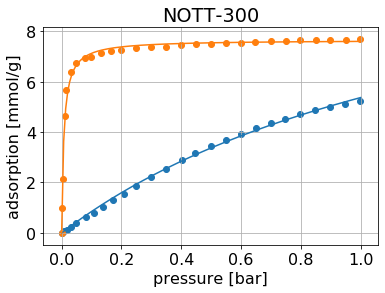

In [121]:
for mof in mofs:
    plt.figure()
    plt.xlabel("pressure [bar]")
    plt.ylabel("adsorption [mmol/g]")
    p = np.linspace(0, 1.0, num=150)
    for gas in ["CO2", "SO2"]:
        plt.scatter(df[mof][gas]["P(bar)"], df[mof][gas]["L(mmol/g)"])
        plt.plot(p, isotherms[mof][gas].loading(p), color=colors[gas])
    plt.grid("on")
    plt.title(mof)

In [122]:
mof = "NOTT-300"
q = pyiast.iast([0.1, 0.1], [isotherms[mof]["CO2"], isotherms[mof]["SO2"]], verboseflag=True)

2 components.
	Partial pressure component 0 = 0.100000
	Partial pressure component 1 = 0.100000
Component  0
	p =  0.1
	p^0 =  5.479056095248174
	Loading:  0.1310093831960643
	x =  0.018251318888070356
	Spreading pressure =  20.586500046548633
Component  1
	p =  0.1
	p^0 =  0.1018590622263326
	Loading:  7.047068212154934
	x =  0.9817486811119296
	Spreading pressure =  20.586500046548633
                      Component 0: p^0 = 5.479056 > 0.998058, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
